# Estadistica para negocios

## Abriendo y explorando una base de datos en Python

En este notebook, abriremos una base de datos de ventas de una firma de retail. Para ello, utilizaremos el modulo Pandas (`pandas`).

Pandas es un paquete de manipulacion de bases de datos en Python. Entre sus caracteristicas principales, se cuenta:

- Permite abrir bases de datos en distintos formatos (Excel, Stata, CSV, SPSS, etc.)
- Permite describir variables, calcular medias, varianzas, cuantiles, etc.
- Permite manipular variables (crear nuevas variables, eliminar observaciones o variables, reemplazar, etc.)
- Pemite manipulacion avanzada (agrupar, agregar, etc.)

## Paso 1: Abrir modulos y la base de datos en Python

A continuacion, abriremos Pandas en Python, y lo nombraremos con el pseudonimo `pd`:

In [1]:
import pandas as pd

Luego, abriremos la base de datos `base_ventas.xlsx` que esta en la carpeta. Esta base de datos contiene informacion de 473 trabajadores de una empresa de retail. Las variables de la base de datos son:

- `ventas`: Ventas del trabajador en el ultimo periodo
- `capacitacion`: Variable igual a 1 si el trabajador esta capacitado
- `edad`: Edad en años
- `educ`: Escolaridad en años

La siguiente linea de codigo abre la base de datos y la guarda en un elemento llamado `df`:

In [2]:
df = pd.read_excel('base_ventas.xlsx')

La base de datos puede ser abierta directamente:

In [3]:
df

,ventas,capacitacion,edad,educ
0,9.141866e+05,1,38,10.0
1,8.306136e+05,0,45,12.0
2,4.604594e+05,0,41,11.0
3,5.377235e+05,0,42,10.0
4,8.912407e+05,0,39,13.0
...,...,...,...,...
468,1.589913e+06,0,44,15.5
469,3.317825e+06,1,43,12.0
470,9.670738e+05,1,38,12.0
471,1.137940e+06,1,35,10.0


Para abrir una variable especifica en la base de datos, basta con utilizar la siguiente sintaxis: `base['nombrevariable']`.

Por ejemplo, para abrir la variable `edad`:

In [5]:
df['edad']

0      38
1      45
2      41
3      42
4      39
       ..
468    44
469    43
470    38
471    35
472    37
Name: edad, Length: 473, dtype: int64

### Crear variable nueva en la base de datos

Supongamos que las ventas (que estan expresadas en pesos), deben ser escaladas a 'miles de pesos'. Para ello, podemos agregar una nueva variable en la base de datos de la siguiente forma:

In [ ]:
df['ventas_miles'] = df['ventas']/1000

Notar que la variable `ventas_miles` no existia en la base de datos. Lo que hicimos fue crear una nueva variable, basada en una variable existente.

## Tablas de frecuencias

Pandas permite hacer tablas de frecuencias directamente sobre las variables de una base de datos. Para ello, solo se debe utilizar el _metodo_ `value_counts()` sobre la variable de interes.

Por ejemplo, para calcular la frecuencia de la variable `edad`:

In [9]:
df['edad'].value_counts()

34    39
40    36
42    30
46    28
44    26
39    26
38    23
35    21
41    20
45    20
51    20
50    20
37    20
43    19
49    18
47    17
48    16
36    16
52     9
53     9
54     7
57     7
58     5
56     3
29     3
55     3
31     2
59     2
26     1
23     1
60     1
61     1
63     1
32     1
28     1
25     1
Name: edad, dtype: int64

Notar que la variable `edad` tiene varios posibles valores. Para hacer mas sencillo el analisis, se puede utilizar la opcion `bins` dentro del parentesis de `value_counts()`. Esta opcion permite establecer un numero de rangos de la variable.

Vamos a calcular la frecuencia de 4 rangos de la variable `edad`. Adicionalmente, utilizaremos la opcion `sort=False` para que las frecuencias aparezcan por orden de rango, y no por orden de frecuencia:

In [12]:
df['edad'].value_counts(bins=4,sort=False)

(22.959, 33.0]     10
(33.0, 43.0]      250
(43.0, 53.0]      183
(53.0, 63.0]       30
Name: edad, dtype: int64

*Ejercicio*: Calcule una tabla de frecuencia de la variable escolaridad con 4 rangos:

## Graficos

Pandas permite realizar graficas directamente sobre las variables. Esta funcionalidad ocupa un paquete llamado `matplotlib`. Por el momento, no utilizaremos el paquete directamente, sino que usaremos la funcionalidad grafica que integra Pandas.

### Graficos de barras

Para hacer un grafico de barras en una variable, solo basta con usar el metodo `bar()` sobre la frecuencia de dicha variable. Por ejemplo, para conocer la proporcion de personas capacitadas:

<Axes: >

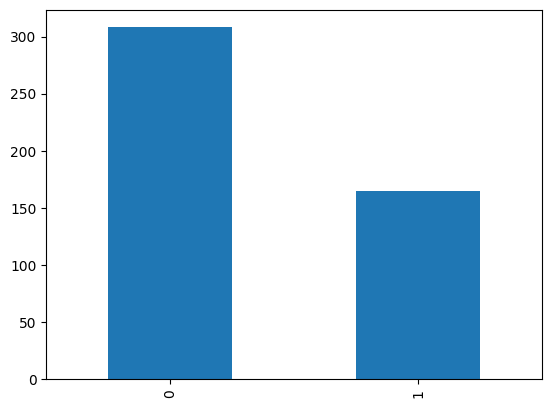

In [19]:
df['capacitacion'].value_counts().plot.bar()

Otro grafico util es el *histograma*. Un histograma muestra la distribucion de una variable en distintos rangos.

Para hacer un histograma, se utiliza el metodo `hist()`. Por ejemplo, para conocer la distribucion de la edad:

<Axes: >

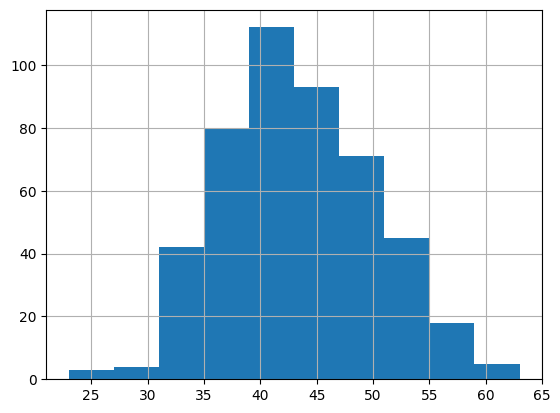

In [21]:
df['edad'].hist()

Los histogramas pueden ser personalizados:

<Axes: >

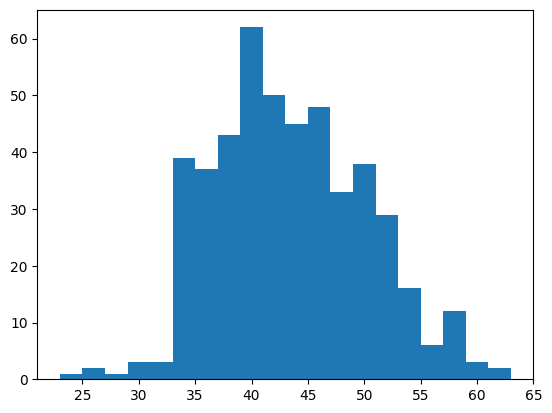

In [25]:
df['edad'].hist(bins=20,grid=False)

## Medidas de estadistica descriptiva

### Media

Para calcular la media en Pandas, utilizaremos el metodo `mean()`:

In [26]:
df.mean()

ventas          1.634862e+06
capacitacion    3.488372e-01
edad            4.298732e+01
educ            1.214376e+01
dtype: float64

Tambien se puede calcular la media de un subconjunto de variables:

In [27]:
df[['capacitacion','edad','educ']].mean()

capacitacion     0.348837
edad            42.987315
educ            12.143763
dtype: float64

### Mediana

Para calcular la mediana, se puede utilizar el comando `median()`:

In [28]:
df.median()

ventas          1.291804e+06
capacitacion    0.000000e+00
edad            4.200000e+01
educ            1.200000e+01
dtype: float64

### Cuantiles

Los cuantiles se calculan usando el metodo `quantile()`. Dentro del parentesis, se deben especificar los cuantiles requeridos (en numeracion entre 0 y 1), dentro de _corchetes_ ([]).

Por ejemplo, los cuartiles de las ventas son:

In [29]:
df['ventas'].quantile([0.25,0.5,0.75])

0.25    5.960919e+05
0.50    1.291804e+06
0.75    2.378664e+06
Name: ventas, dtype: float64

Alternativamente, podemos usar un histograma:

<Axes: >

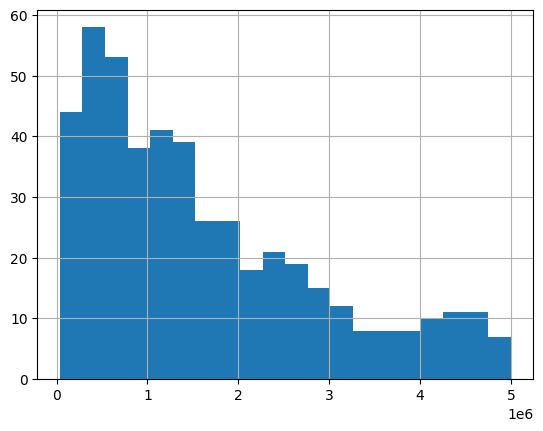

In [31]:
df['ventas'].hist(bins=20)

### Varianza y desviacion estandar

La varianza de una base de datos se obtiene a traves del metodo `var()`, mientras que la desviacion estandar se obtiene a traves del metodo `std()`:

In [32]:
df.var()

ventas          1.637545e+12
capacitacion    2.276311e-01
edad            4.458035e+01
educ            1.458865e+00
dtype: float64

In [33]:
df.std()

ventas          1.279666e+06
capacitacion    4.771070e-01
edad            6.676852e+00
educ            1.207835e+00
dtype: float64

### Descripcion estadistica

Finalmente, gran parte de esta informacion se puede obtener usando el metodo `describe()`:

In [34]:
df.describe()

,ventas,capacitacion,edad,educ
count,4.730000e+02,473.000000,473.000000,473.000000
mean,1.634862e+06,0.348837,42.987315,12.143763
std,1.279666e+06,0.477107,6.676852,1.207835
min,3.589416e+04,0.000000,23.000000,8.000000
25%,5.960919e+05,0.000000,38.000000,12.000000
50%,1.291804e+06,0.000000,42.000000,12.000000
75%,2.378664e+06,1.000000,48.000000,12.000000
max,4.999110e+06,1.000000,63.000000,19.000000


## Tabulacion en dos dimensiones

Para crear una tabla en dos dimensiones, podemos usar la funcion `crosstab()` sobre dos variables.

Por ejemplo, para tabular `edad` y `educ`:

In [38]:
pd.crosstab(df['edad'],df['educ'])

educ,8.0,9.0,10.0,10.5,11.0,11.5,12.0,12.1,12.3,12.5,...,13.3,13.5,13.7,14.0,14.5,15.0,15.5,16.0,17.0,19.0
edad,,,,,,,,,,,,,,,,,,,,,
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,1,0,1,0,5,0,24,1,1,0,...,1,1,0,0,0,0,0,1,0,0
35,0,0,3,0,1,0,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Correlacion

Finalmente, podemos calcular el coeficiente de correlacion a traves del metodo `corr()`:

In [39]:
df.corr()

,ventas,capacitacion,edad,educ
ventas,1.000000,0.093534,0.348796,-0.030270
capacitacion,0.093534,1.000000,-0.155566,-0.076181
edad,0.348796,-0.155566,1.000000,0.042024
educ,-0.030270,-0.076181,0.042024,1.000000
